In [1]:
import keras

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
InceptionV3_obj = keras.applications.inception_v3.InceptionV3(
    weights=None, input_shape=(299,299,3), include_top=False, pooling='avg')
Xception_obj = keras.applications.xception.Xception(
    weights=None, input_shape=(299,299,3), include_top=False, pooling='avg')
InceptionResNetV2_obj = keras.applications.inception_resnet_v2.InceptionResNetV2(
    weights=None, input_shape=(299,299,3), include_top=False, pooling='avg')

for layer in InceptionV3_obj.layers:
    layer.trainable = False 
for layer in Xception_obj.layers:
    layer.trainable = False
for layer in InceptionResNetV2_obj.layers:
    layer.trainable = False

In [5]:
input_layer = keras.Input((299, 299, 3))
a = InceptionV3_obj(input_layer)  
b = Xception_obj(input_layer) 
c = InceptionResNetV2_obj(input_layer) 

x = keras.layers.Concatenate()([a,b,c])
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

model_obj = keras.models.Model(inputs=input_layer, outputs=x)

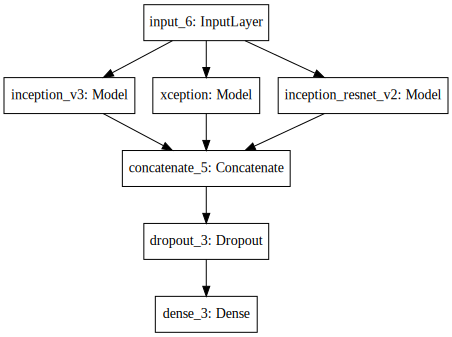

In [6]:
# 可视化模型
keras.utils.plot_model(model_obj, to_file='model_virtual.png')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model_obj).create(prog='dot', format='svg'))